In [193]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [266]:
filename = 'finaldf.csv'
dataset = read_csv(filename)
dataset.head()

,Unnamed: 0,Monthly Nominal GDP Index (inMillion$),Year,Month,Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",...,Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory,Federal,Event,Sales(In ThousandDollars)
0,0,14421.75290,2009,1,14407.05334,233.402,Democrats,7.8,12.03,11.44,...,9.296,7.559,799,12.589,4.17,11.55,WomenClothing,2,0,1755.0
1,1,14421.75290,2009,1,14407.05334,233.402,Democrats,7.8,12.03,11.44,...,9.296,7.559,799,12.589,4.17,11.55,MenClothing,2,0,524.0
2,2,14421.75290,2009,1,14407.05334,233.402,Democrats,7.8,12.03,11.44,...,9.296,7.559,799,12.589,4.17,11.55,OtherClothing,2,0,936.0
3,3,14389.20047,2009,2,14366.17657,234.663,Democrats,8.3,12.97,11.05,...,9.296,7.559,799,12.589,3.87,11.10,WomenClothing,1,1,1729.0
4,4,14389.20047,2009,2,14366.17657,234.663,Democrats,8.3,12.97,11.05,...,9.296,7.559,799,12.589,3.87,11.10,MenClothing,1,1,496.0


In [267]:
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [268]:
dataset = dataset.drop('PartyInPower', axis = 1)

In [269]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#gbank['checking_balance'] = le.fit_transform(gbank['checking_balance'])

def Encoder(a):
    le = LabelEncoder()
    x = le.fit_transform(a)
    return x

dataset[["ProductCategory"]] = Encoder(dataset[["ProductCategory"]])

In [270]:
print(dataset.dtypes)
print('Dataset Shape:', dataset.shape)

Monthly Nominal GDP Index (inMillion$)                               float64
Year                                                                   int64
Month                                                                  int64
Monthly Real GDP Index (inMillion$)                                  float64
CPI                                                                  float64
unemployment rate                                                    float64
CommercialBankInterestRateonCreditCardPlans                          float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    float64
Earnings or wages  in dollars per hour                               float64
AdvertisingExpenses (in Thousand Dollars)                             object
Cotton Monthly Price - US cents per Pound(lbs)                       float64
Change(in%)                                                          float64
Average upland planted(million acres)                                float64

In [271]:
dataset["AdvertisingExpenses (in Thousand Dollars)"].head(10)
dataset["AdvertisingExpenses (in Thousand Dollars)"] = dataset["AdvertisingExpenses (in Thousand Dollars)"].replace('?', np.nan)
dataset["AdvertisingExpenses (in Thousand Dollars)"].isnull().sum(axis=0)

186

The AdvertisingExpenses column datatype is shown as object but it should be an Integer/ Float. By doing a head on that column i could see "?" in the columns. When replacing those with NaN's, I could see 186 Missing values are there out of 216. So, I'm Dropping the columns. 

In [272]:
dataset = dataset.drop('AdvertisingExpenses (in Thousand Dollars)', axis = 1)
dataset.isnull().sum()

Monthly Nominal GDP Index (inMillion$)                                0
Year                                                                  0
Month                                                                 0
Monthly Real GDP Index (inMillion$)                                   0
CPI                                                                   0
unemployment rate                                                     0
CommercialBankInterestRateonCreditCardPlans                           0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan     0
Earnings or wages  in dollars per hour                                0
Cotton Monthly Price - US cents per Pound(lbs)                        0
Change(in%)                                                           0
Average upland planted(million acres)                                 0
Average upland harvested(million acres)                               0
yieldperharvested acre                                          

After dropping 'AdvertisingExpenses (in Thousand Dollars)' I could see that Sales column which is the dependent column and the number of missing values is less so imputing those with the median.

In [273]:
from sklearn.preprocessing import Imputer
values = dataset[["Sales(In ThousandDollars)"]].values
imputer = Imputer(missing_values='NaN', strategy='median')
dataset[["Sales(In ThousandDollars)"]] = imputer.fit_transform(values)

dataset[["Sales(In ThousandDollars)"]].isnull().sum()

Sales(In ThousandDollars)    0
dtype: int64

In [202]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly Nominal GDP Index (inMillion$),216.0,15862.572709,1041.077888,14317.37292,15000.819037,15852.443875,16652.307692,17765.33757
Year,216.0,2011.500000,1.711792,2009.00000,2010.000000,2011.500000,2013.000000,2014.00000
Month,216.0,6.500000,3.460071,1.00000,3.750000,6.500000,9.250000,12.00000
Monthly Real GDP Index (inMillion$),216.0,15200.606901,543.773465,14345.67610,14794.380148,15237.984080,15590.062665,16243.05473
CPI,216.0,249.176222,8.490405,233.40200,241.129000,250.171500,256.950500,261.49800
unemployment rate,216.0,8.238889,1.250290,5.60000,7.450000,8.300000,9.400000,10.00000
CommercialBankInterestRateonCreditCardPlans,216.0,12.626389,0.797381,11.82000,11.925000,12.310000,13.440000,14.26000
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",216.0,10.675556,0.439265,9.57000,10.355000,10.800000,10.980000,11.44000
Earnings or wages in dollars per hour,216.0,23.280000,0.801266,21.96000,22.565000,23.265000,23.905000,24.78000
Cotton Monthly Price - US cents per Pound(lbs),216.0,97.274306,36.530268,51.50000,79.380000,89.890000,99.650000,229.67000


In [203]:
dataset.corr()

,Monthly Nominal GDP Index (inMillion$),Year,Month,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),...,Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,ProductCategory,Federal,Event,Sales(In ThousandDollars)
Monthly Nominal GDP Index (inMillion$),1.000000,0.980117,0.171463,0.996804,0.975682,-0.925558,-0.834934,-0.745742,0.981173,-0.052016,...,0.313088,0.125845,0.015119,0.128631,0.153626,-0.405594,0.000000,-0.010191,0.010527,0.215581
Year,0.980117,1.000000,0.000000,0.970728,0.978135,-0.906225,-0.825995,-0.759162,0.982928,-0.004127,...,0.315150,0.091648,0.052379,0.104102,0.099744,-0.375662,0.000000,-0.035361,-0.024945,0.195527
Month,0.171463,0.000000,1.000000,0.189497,0.131342,-0.066766,-0.090933,-0.084094,0.093814,-0.129250,...,0.062754,0.212693,-0.132000,0.167164,0.000310,-0.137031,0.000000,0.162443,0.259159,0.142559
Monthly Real GDP Index (inMillion$),0.996804,0.970728,0.189497,1.000000,0.964330,-0.907454,-0.805455,-0.731316,0.973840,-0.035642,...,0.320355,0.154701,0.003623,0.153697,0.146046,-0.382533,0.000000,-0.002517,0.012442,0.216826
CPI,0.975682,0.978135,0.131342,0.964330,1.000000,-0.869079,-0.854688,-0.758593,0.964981,-0.004037,...,0.392013,0.126428,0.038918,0.132092,0.071688,-0.398986,0.000000,-0.052668,-0.017482,0.199000
unemployment rate,-0.925558,-0.906225,-0.066766,-0.907454,-0.869079,1.000000,0.862677,0.700418,-0.911239,0.222489,...,-0.148274,0.047932,-0.020579,0.033997,-0.323157,0.496563,0.000000,0.009606,-0.018594,-0.195702
CommercialBankInterestRateonCreditCardPlans,-0.834934,-0.825995,-0.090933,-0.805455,-0.854688,0.862677,1.000000,0.629292,-0.821359,0.205823,...,-0.446080,-0.046135,-0.021748,-0.043434,-0.231278,0.470729,0.000000,-0.027503,0.027207,-0.160726
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",-0.745742,-0.759162,-0.084094,-0.731316,-0.758593,0.700418,0.629292,1.000000,-0.762773,0.151066,...,-0.128818,0.139309,-0.172168,0.069180,0.060007,0.356229,0.000000,0.053063,-0.005130,-0.143688
Earnings or wages in dollars per hour,0.981173,0.982928,0.093814,0.973840,0.964981,-0.911239,-0.821359,-0.762773,1.000000,-0.026556,...,0.293720,0.078657,0.015154,0.081769,0.116824,-0.407699,0.000000,0.024605,0.035705,0.205753
Cotton Monthly Price - US cents per Pound(lbs),-0.052016,-0.004127,-0.129250,-0.035642,-0.004037,0.222489,0.205823,0.151066,-0.026556,1.000000,...,0.239869,0.533370,0.177688,0.541117,0.096928,0.692062,0.000000,0.042187,-0.003687,0.005777


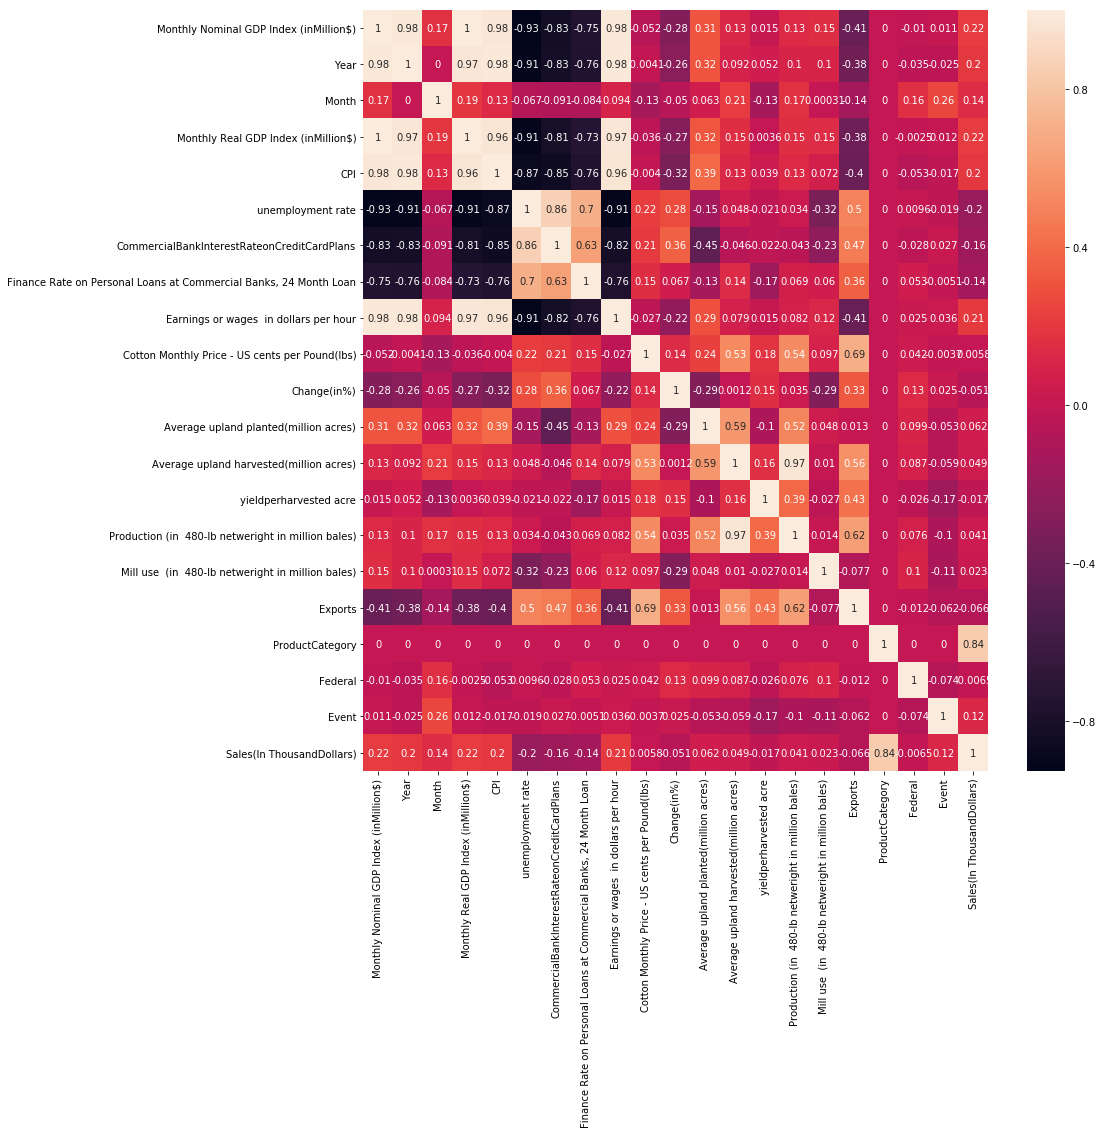

In [204]:
corr = dataset.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sn.heatmap(corr,annot=True)

From the above we could see that most of the variables have a good amount of correlation to the sales, 

Product Category - 0.84
Earning/Wages - 0.21
CPI - 0.2
Monthly real and nominal GDP index - 0.22
Event Holidays - 0.12

unemployment rate - is highly negatively correlated with sales -0.2

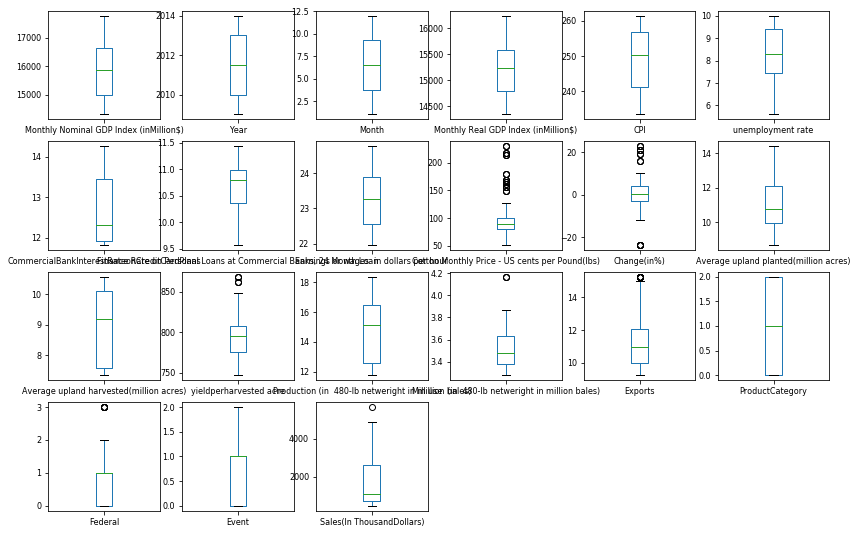

In [292]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), fontsize=8, figsize=(14,14))
pyplot.show()

Cotton Monthly Price - US cents per Pound(lbs) has too many outliers to it. Ebven though it has 0.058 correlation to the sales. lets try to treat the outliers and build the model on top of it and Change % is negatively correlated with the sales variable so i havent treated it.

In [206]:
dataset[["Cotton Monthly Price - US cents per Pound(lbs)"]] = dataset[["Cotton Monthly Price - US cents per Pound(lbs)"]].apply(zscore)
dataset[["Change(in%)"]] = dataset[["Change(in%)"]].apply(zscore)

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median().axis=0       
    return group

dataset[["Cotton Monthly Price - US cents per Pound(lbs)"]] = replace(dataset[["Cotton Monthly Price - US cents per Pound(lbs)"]])
dataset[["Change(in%)"]] 

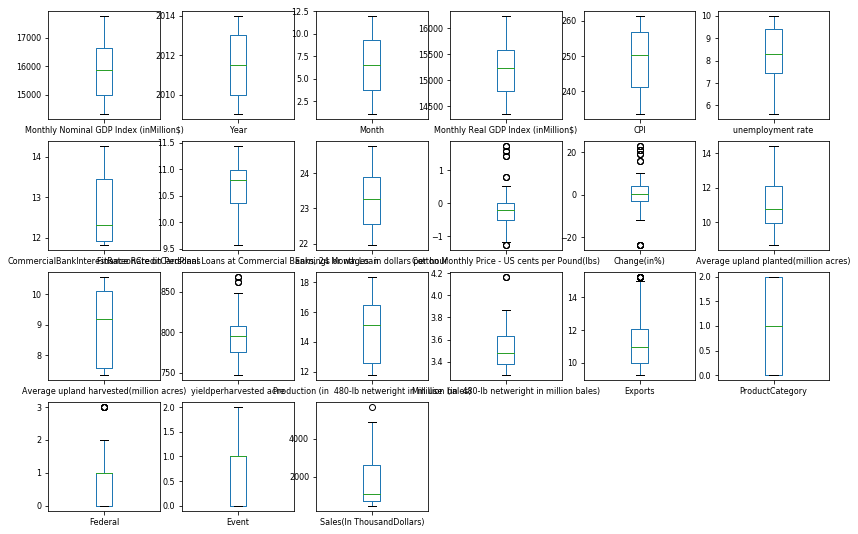

In [207]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), fontsize=8, figsize=(14,14))
pyplot.show()

In [290]:
X = dataset.drop('Sales(In ThousandDollars)', axis=1)
Y = dataset[['Sales(In ThousandDollars)']]

In [291]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00465116e+00  9.84675833e-01  1.72260154e-01  1.00144051e+00
   9.80219747e-01 -9.29863167e-01 -8.38817220e-01 -7.49210971e-01
   9.85736309e-01 -5.22584335e-02 -2.82145784e-01  3.14544211e-01
   1.26429838e-01  1.51892902e-02  1.29229379e-01  1.54340565e-01
  -4.07480133e-01  7.86941851e-19 -1.02383187e-02  1.05757177e-02]
 [ 9.84675833e-01  1.00465116e+00  7.51449511e-18  9.75242751e-01
   9.82684203e-01 -9.10439565e-01 -8.29836337e-01 -7.62692552e-01
   9.87500039e-01 -4.14618352e-03 -2.60236471e-01  3.16615654e-01
   9.20741094e-02  5.26231144e-02  1.04586288e-01  1.00208419e-01
  -3.77409044e-01  2.96607394e-19 -3.55250694e-02 -2.50608671e-02]
 [ 1.72260154e-01  7.51449511e-18  1.00465116e+00  1.90378441e-01
   1.31952933e-01 -6.70768518e-02 -9.13559374e-02 -8.44853686e-02
   9.42501391e-02 -1.29850838e-01 -5.05088774e-02  6.30456257e-02
   2.13682701e-01 -1.32613577e-01  1.67941198e-01  3.11647059e-04
  -1.37667935e-01  5.52573678e-18  1.63198535e-01  2

In [276]:
# Test options and evaluation metric

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

num_folds = 10
seed = 7
scoring = 'mean_squared_error'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. 
The three algorithms selected include:

Linear Algorithms: Linear Regression (LR)

Nonlinear Algorithms: Classiffication and Regression Trees (CART) and k-Nearest Neighbors (KNN).

In [277]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [278]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed) #setting the splits 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) #why scoring why not accuracy?
    rmse = np.sqrt(-cv_results)
    pricemean = np.float64(Y_train.mean())
    rmsePercentage = rmse/pricemean*100
    results.append(rmse)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rmsePercentage.mean(), cv_results.std()) #cv is in negative number 
    print(msg)

LR: 37.474118 (109355.864117)
KNN: 76.614607 (357813.325965)
CART: 22.057336 (89762.334085)


In [279]:
# Standardize the dataset
pipelinesmodel = []
pipelinesmodel.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelinesmodel.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
pipelinesmodel.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
import numpy as np
results = []
names = []
for name, model in pipelinesmodel:
   kfold = KFold(n_splits=num_folds, random_state=seed)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   rmseResults=np.sqrt(-cv_results)
   pricemean=np.float64(Y_train.mean())
   results.append(rmseResults)
   rmseResults=rmseResults/pricemean*100
   names.append(name)
   msg = "%s: %f (%f)" % (name, rmseResults.mean(), rmseResults.std())
   print(msg)

ScaledLR: 37.474118 (5.163969)
ScaledKNN: 56.105231 (7.554896)
ScaledCART: 21.788730 (10.061413)


CART gives the lesser error of 20% compared to other models. So lets tune those hyper parameters and see what needs to be done.

In [280]:
scaler = StandardScaler().fit(X_train)
scaledX = scaler.transform(X_train)
max_depth = np.array([1,3,5,7,9,10,11,15,17,19,21])
min_samples_leaf=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaledX, Y_train)

In [281]:
print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 164649.087209 using {'max_depth': 21, 'min_samples_leaf': 1}


In [283]:
# Standardize the dataset
pipelinesmodel = []
pipelinesmodel.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor(max_depth = 21, min_samples_leaf = 1))])))
import numpy as np
results = []
names = []
for name, model in pipelinesmodel:
   kfold = KFold(n_splits=num_folds, random_state=seed)
   cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   rmseResults=np.sqrt(-cv_results)
   pricemean=np.float64(Y_train.mean())
   results.append(rmseResults)
   rmseResults=rmseResults/pricemean*100
   names.append(name)
   msg = "%s: %f (%f)" % (name, rmseResults.mean(), rmseResults.std())
   print(msg)

ScaledCART: 21.842586 (7.180159)


In [284]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    rmseResults=np.sqrt(-cv_results)
    pricemean=np.float64(Y_train.mean())
    rmseResults=rmseResults/pricemean*100
    results.append(rmseResults)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rmseResults.mean(), rmseResults.std())
    print(msg)

ScaledAB: 21.411979 (5.905557)
ScaledRF: 18.896798 (5.061962)


Random forest gives us a better accuracy, so lets try to fine tune it more.

In [285]:
# Parameters for RF
param_grid = {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Tune scaled Random Forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (-grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%f (%f) with: %r" % (-mean, stdev, param))

Best: 123351.182779 using {'n_estimators': 50}
126583.844331 (67075.709479) with: {'n_estimators': 10}
126038.864953 (58939.183270) with: {'n_estimators': 20}
127302.381195 (61660.879993) with: {'n_estimators': 30}
123953.920189 (58182.222626) with: {'n_estimators': 40}
123351.182779 (56444.693438) with: {'n_estimators': 50}
124173.086396 (57568.702397) with: {'n_estimators': 60}
123639.428114 (55622.026413) with: {'n_estimators': 70}
123638.003331 (55920.180385) with: {'n_estimators': 80}
124417.329676 (57069.181148) with: {'n_estimators': 90}
123730.300212 (54770.627236) with: {'n_estimators': 100}


In [286]:
ensembles = []
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators = 100))])))
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    rmseResults=np.sqrt(-cv_results)
    pricemean=np.float64(Y_train.mean())
    rmseResults=rmseResults/pricemean*100
    results.append(rmseResults)
    names.append(name)
    msg = "%s: %f (%f)" % (name, rmseResults.mean(), rmseResults.std())
    print(msg)

ScaledRF: 19.487023 (4.892698)


In [287]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [288]:
indices = np.argsort(model.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         model.feature_importances_[indices[f]]]

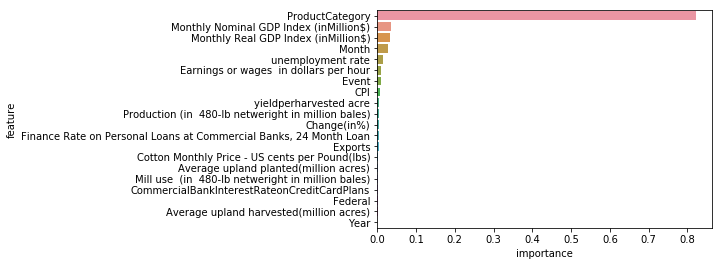

In [289]:
import seaborn as sns
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [237]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed, n_estimators=40)
model.fit(rescaledX, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=7, verbose=0, warm_start=False)

In [246]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
priceMean = np.float64(Y_train.mean())
mse = mean_squared_error(Y_validation, predictions)
rmse = np.sqrt(mse)
print(rmse/priceMean*100)

33.33650881665397
